1/1 [==============================] - 0s 84ms/step


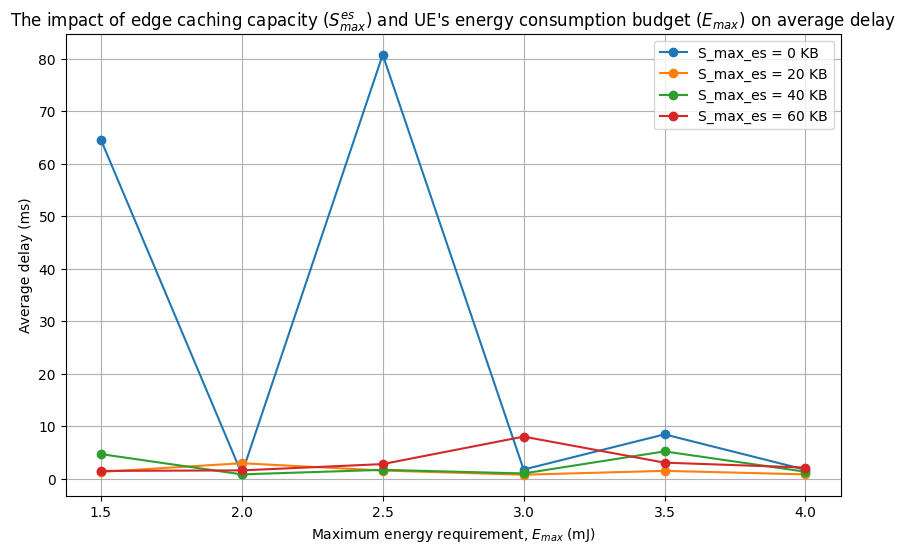

In [8]:
# Assuming you have the DDQNAgent and EdgeComputingEnvironment classes defined as before
env = EdgeComputingEnvironment()

# Define your parameter ranges
S_max_es_values = [0, 20, 40, 60]  # in KB
E_max_values = [1.5, 2, 2.5, 3, 3.5, 4]  # in mJ

# Define the number of users/devices
num_users = env.M

# Initialize the DDQN agent
agent = DDQNAgent(env, num_users)

# Define the number of episodes for training and testing steps
num_train_episodes = 1  # or any suitable number for training
num_test_steps = 1  # or any suitable number for testing

# Create the folder for model files if it doesn't exist
model_folder = 'DDQN_Models_Test1'
os.makedirs(model_folder, exist_ok=True)

# Storage for results
results = []

# Training phase
for S_max_es in S_max_es_values:
    for E_max in E_max_values:
        # Set the environment parameters
        env.S_max_es = S_max_es * 1e3  # Convert KB to bytes
        env.E_max = E_max * 1e-3  # Convert mJ to J

        # Train the agent
        agent.train(num_train_episodes)

        # Save the model for this configuration
        model_filename = os.path.join(model_folder, f'DDQN_model_S{S_max_es}_E{E_max}.h5')
        agent.save(model_filename)

# Testing phase
for S_max_es in S_max_es_values:
    for E_max in E_max_values:
        # Load the model for this configuration
        model_filename = os.path.join(model_folder, f'DDQN_model_S{S_max_es}_E{E_max}.h5')
        agent.load(model_filename)

        # Set the environment parameters
        env.S_max_es = S_max_es * 1e3  # Convert KB to bytes
        env.E_max = E_max * 1e-3  # Convert mJ to J

        # Test the agent and get the average delay and alpha
        avg_delay, avg_alpha = agent.test(num_test_steps)

        # Store the results
        results.append({
            'S_max_es': S_max_es,
            'E_max': E_max,
            'avg_delay': avg_delay,
        })

# Plotting the results
plt.figure(figsize=(10, 6))

for S_max_es in S_max_es_values:
    # Extract delays for each S_max_es value
    delays = [result['avg_delay'] for result in results if result['S_max_es'] == S_max_es]

    # Plot the delays
    plt.plot(E_max_values, delays, marker='o', label=f'S_max_es = {S_max_es} KB')

plt.xlabel('Maximum energy requirement, $E_{max}$ (mJ)')
plt.ylabel('Average delay (ms)')
plt.title('The impact of edge caching capacity ($S_{max}^{es}$) and UE\'s energy consumption budget ($E_{max}$) on average delay')
plt.legend()
plt.grid(True)
plt.show()
